# Exp01

<IPython.core.display.Javascript object>


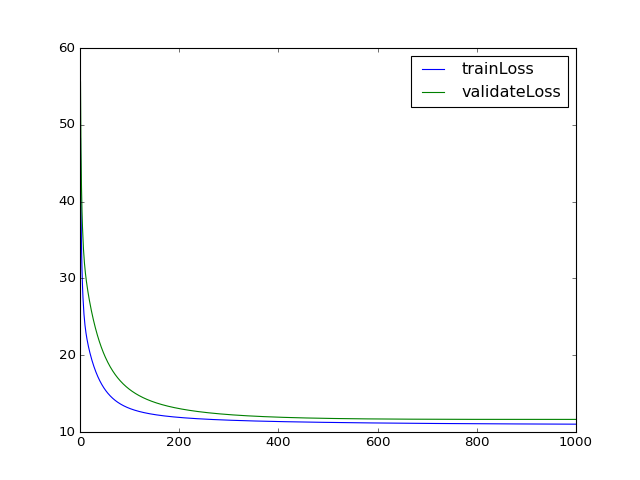

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

filename = "C:\\Users\\admin\\Desktop\\Jupyter\\Housing.txt"
x, y = load_svmlight_file(filename)

x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=1)

# print(x_train.shape)
# print(x_validate.shape)
# print(y_train.shape)
# print(y_validate.shape)

# linreg=LinearRegression()
# linreg.fit(x_train,y_train)
# print(linreg.intercept_)
# print(linreg.coef_)

# y_pred=linreg.predict(x_validate)
# print("MAE (平均绝对误差):%s"%metrics.mean_absolute_error(y_validate,y_pred))
# print("MSE (均方误差):%s"%metrics.mean_squared_error(y_validate,y_pred))
# print("RMSE (均方根误差):%s"%np.sqrt(metrics.mean_squared_error(y_validate,y_pred)))

paramUnit = 20
param = np.ones((1, 13))
learning_rate = 0.1
num_iter = 1000

lossTrain=np.zeros((1, num_iter))
lossValidate=np.zeros((1, num_iter))

for k in range(num_iter):
    a = 0
    b = np.zeros((1, 13))
    lossUnit1 = 0
    lossUnit2 = 0
    for i in range(x_train.shape[0]):
        a += (paramUnit + x_train[i] * param.T) - y_train[i]
        for j in range(13):
            b[0, j] += ((paramUnit + x_train[i] * param.T) - y_train[i]) * x_train[i, j]

    paramUnit = paramUnit - (learning_rate * a / x_train.shape[0])
    for i in range(13):
        param[0, i] = param[0, i] - (learning_rate * b[0, i] / x_train.shape[0])

#     print("第",k,"次迭代：")
#     print("参数：")
#     print(param)
#     print(paramUnit)

    for i in range(x_train.shape[0]):
        c = (paramUnit + x_train[i] * param.T) - y_train[i]
        d = c * c
        lossUnit1 += d

    lossTrain[0,k] = lossUnit1 / (x_train.shape[0] * 2)
#     print("训练误差：",lossTrain)

    for i in range(x_validate.shape[0]):
        c = (paramUnit + x_validate[i] * param.T) - y_validate[i]
        d = c * c
        lossUnit2 += d

    lossValidate[0,k] = lossUnit2 / (x_validate.shape[0] * 2)
#     print("验证误差：",lossValidate)


# print(lossTrain)
# print(lossValidate)
x=np.arange( 1,num_iter+1,1)
plt.plot(x,lossTrain[0],label='trainLoss')
plt.plot(x,lossValidate[0],label='validateLoss')
plt.legend(loc='upper right')
plt.show()

# print(a)
# print(b)
# print(paramUnit)
# print(param)







